<a href="https://colab.research.google.com/github/Alton1998/eardrum-disease-detection/blob/main/EarDrumDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ear Drum Disease Detection

## Mounting Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Unzipping the files

In [ ]:
!unzip /content/drive/MyDrive/EarDrum -d eardrum/

Streaming output truncated to the last 5000 lines.
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/fixedpoint_types.h  
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/metrics.h  
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/numeric_types.h  
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/shared_counter.h  
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/tracking_allocator.h  
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/framework/type_traits.h  
   creating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/lib/
   creating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/lib/core/
  inflating: eardrum/EarDrum/tfjs-env/Lib/site-packages/tensorflow/include/tsl/lib/core/bitmap.h  
  inflating: eardrum/EarDrum/tfjs-

In [ ]:
import os
import shutil

## Extracting only the data
The format of the data should be in the following
structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [ ]:
!mkdir eardrum_train
!mkdir eardrum_train/ABNORMAL
!mkdir eardrum_train/NORMAL
!mkdir eardrum_test
!mkdir eardrum_test/ABNORMAL
!mkdir eardrum_test/NORMAL

In [ ]:
abnormal_files = []
normal_files = []
for currentpath, folders, files in os.walk(os.path.join("eardrum","EarDrum","eardrum")):
    for file in files:
      source_path = os.path.join(currentpath,file)
      target_class = "ABNORMAL" if "Abnormal" in source_path else "NORMAL"
      if target_class=="ABNORMAL":
        abnormal_files.append(source_path)
      else:
        normal_files.append(source_path)

In [ ]:
test_files = []
train_files = []

test_files.extend(abnormal_files[-10:])
test_files.extend(normal_files[-10:])

In [ ]:
test_files

['eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0261.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0377.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0380.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0287.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0329.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0228.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0069.png',
 'eardrum/EarDrum/eardrum/Abnormal/OtitisEksterna/100_0193.png',
 'eardrum/EarDrum/eardrum/Abnormal/TympanostomyTubes/100_0237.png',
 'eardrum/EarDrum/eardrum/Abnormal/TympanostomyTubes/100_0236.png',
 'eardrum/EarDrum/eardrum/Normal/100_0332.png',
 'eardrum/EarDrum/eardrum/Normal/100_0276.png',
 'eardrum/EarDrum/eardrum/Normal/100_0064.png',
 'eardrum/EarDrum/eardrum/Normal/100_0312.png',
 'eardrum/EarDrum/eardrum/Normal/100_0342.png',
 'eardrum/EarDrum/eardrum/Normal/100_0087.png',
 'eardrum/EarDrum/eardrum/Normal/100_0194.png',
 'eardru

In [ ]:
train_files = []
train_files.extend(abnormal_files[:-10])
train_files.extend(normal_files[:-10])

In [ ]:
train_files

['eardrum/EarDrum/eardrum/Abnormal/Miringoskleroz/100_0035.png',
 'eardrum/EarDrum/eardrum/Abnormal/Miringoskleroz/100_0036.png',
 'eardrum/EarDrum/eardrum/Abnormal/Miringoskleroz/100_0046.png',
 'eardrum/EarDrum/eardrum/Abnormal/Miringoskleroz/100_0254.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0126.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0157.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0161.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0166.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0198.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0214.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0165.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0282.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0059.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0253.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0216.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0141.png',
 'eardrum/EarDrum/eardrum/Abnormal/CSOM/100_0083.png',
 'eardrum/EarDrum/eardrum

In [ ]:
for file in test_files:
  target_class = "ABNORMAL" if "Abnormal" in file else "NORMAL"
  dest_path = os.path.join("eardrum_test",target_class,file.split("/")[-1])
  shutil.copy(file,dest_path)
for file in train_files:
  target_class = "ABNORMAL" if "Abnormal" in file else "NORMAL"
  dest_path = os.path.join("eardrum_train",target_class,file.split("/")[-1])
  shutil.copy(file,dest_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
import seaborn as sns

In [ ]:
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range = 0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
dim1 = []
dim2 = []
for current_path,folders,files in os.walk("eardrum_train"):
  for file in files:
    img = imread(os.path.join(current_path,file))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

## Sizes of all images

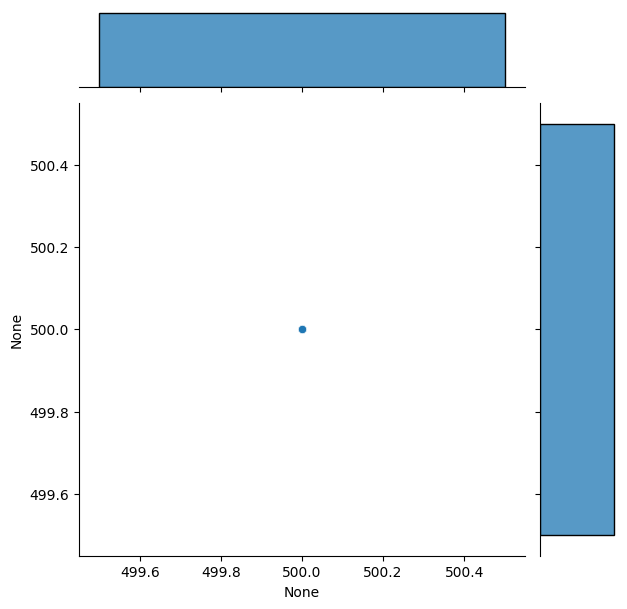

In [ ]:
sns.jointplot(x=dim1,y=dim2)

In [ ]:
len(os.listdir(os.path.join("eardrum_train","ABNORMAL")))

118

In [ ]:
len(os.listdir(os.path.join("eardrum_train","NORMAL")))

144

## Training Data

In [ ]:
train_image_gen = image_gen.flow_from_directory("eardrum_train",
                                               target_size=(500,500),
                                                color_mode='rgb',
                                               batch_size=12,
                                               class_mode='binary')

Found 262 images belonging to 2 classes.


## Test Data

In [ ]:
test_image_gen = image_gen.flow_from_directory("eardrum_test",
                                               target_size=(500,500),
                                                color_mode='rgb',
                                               batch_size=12,
                                               class_mode='binary')

Found 20 images belonging to 2 classes.


## Model Creation

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
image_shape=(500,500,3)
model = Sequential()

In [ ]:
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 123, 123, 32)      128       
 Normalization)                                                  
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
22/22 [==============================] - 85s 4s/step - loss: 8.2516 - accuracy: 0.5038 - val_loss: 7.2998 - val_accuracy: 0.5000
Epoch 2/20
22/22 [==============================] - 86s 4s/step - loss: 4.7341 - accuracy: 0.5000 - val_loss: 4.2107 - val_accuracy: 0.5500
Epoch 3/20
22/22 [==============================] - 81s 4s/step - loss: 3.1938 - accuracy: 0.5076 - val_loss: 6.3587 - val_accuracy: 0.5500
Epoch 4/20
22/22 [==============================] - 90s 4s/step - loss: 2.7660 - accuracy: 0.4771 - val_loss: 1.8083 - val_accuracy: 0.5000
Epoch 5/20
22/22 [==============================] - 81s 4s/step - loss: 1.6231 - accuracy: 0.5038 - val_loss: 0.8145 - val_accuracy: 0.6500
Epoch 6/20
22/22 [==============================] - 84s 4s/step - loss: 0.8506 - accuracy: 0.5305 - val_loss: 0.6881 - val_accuracy: 0.4000
Epoch 7/20
22/22 [==============================] - 80s 4s/step - loss: 0.8990 - accuracy: 0.5229 - val_loss: 0.7760 - val_accuracy: 0.5500
Epoch 8/20
22/22 [==

In [ ]:
import pandas as pd

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

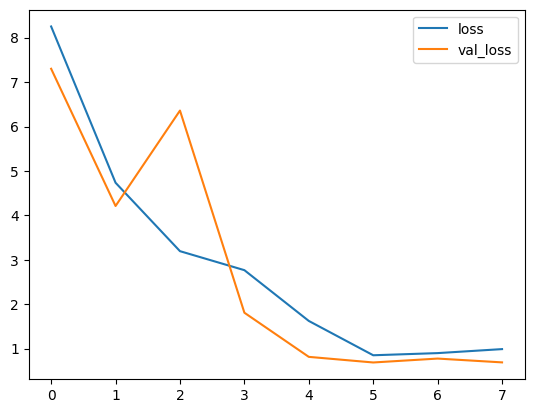

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
resnet = ResNet50(include_top=)